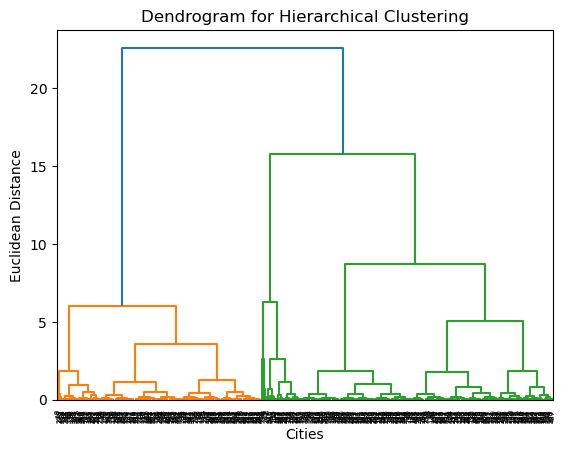

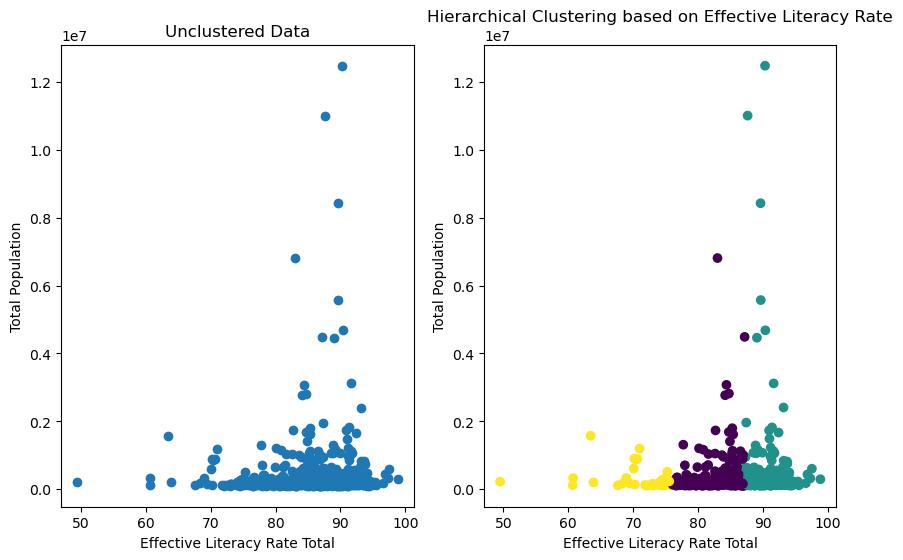

In [13]:
# Hierarchical Clustering
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the dataset
# Change the dataset path to its exact path
data = pd.read_csv('./Datasets/cities_r2.csv')

# Step 2: Data Preprocessing
# Handle missing values for numeric columns by filling with the mean
# numeric_cols = df.select_dtypes(include=['int64','float64']).columns
# df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle missing values for categorical columns by filling with the mode
# categorical_cols = df.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#   df[col].fillna(df[col].mode()[0])  # Fill with the mode for categorical columns

# Step 3: Data Transformation
# Label Encoding for categorical columns
# for col in categorical_cols:
#   df[col] = LabelEncoder().fit_transform(df[col])

# Step 4: Apply Hierarchical Clustering based on 'effective_literacy_rate_total'
X = data[['effective_literacy_rate_total']]  # Using 'effective_literacy_rate_total' for clustering
y = data['population_total']

X_scaled = StandardScaler().fit_transform(X)

# Plot the dendrogram
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cities')
plt.ylabel('Euclidean Distance')
plt.show()

# Apply Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)  # Assuming 3 clusters
labels = hc.fit_predict(X_scaled)

# Step 5: Visualizing the clusters
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.scatter(X, y)
plt.title('Unclustered Data')
plt.xlabel('Effective Literacy Rate Total')
plt.ylabel('Total Population')

plt.subplot(1,2,2)
plt.scatter(X, y, c=labels)
plt.title('Hierarchical Clustering based on Effective Literacy Rate')
plt.xlabel('Effective Literacy Rate Total')
plt.ylabel('Total Population')
plt.show()
